In [1]:
import sqlite3
from keras.models import load_model
from matplotlib.pyplot import imshow
import tqdm.notebook as tqdm
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time
import uuid
import json
from imageio import imread

from multiprocessing import Pool, Process

import pickle

import numpy as np

from FaceLoader import FaceLoader
from SocialProcessor import SocialProcessor

%matplotlib inline

Using TensorFlow backend.


In [2]:
import vk_api

In [3]:
conn = sqlite3.connect('scraped.db')

In [4]:
model_path = 'keras-facenet-master/model/keras/model/facenet_keras.h5'
model = load_model(model_path)

/Users/aleksandrdremov/anaconda3/envs/FaceScrape/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
def aunt_vk():
    return input(), True
def capt_vk(captcha):
    print(captcha.get_url())
    inp = input()
    captcha.try_again(inp)

In [6]:
credentials = {}
with open('credentials.json', 'r') as file:
    credentials = json.load(file)

In [7]:
vk_session = vk_api.VkApi(credentials['login'], credentials['password'], auth_handler=aunt_vk, captcha_handler=capt_vk)
vk_session.auth()

api = vk_session.get_api()

In [8]:
with open('vk_already.pcl', 'rb') as file:
    ids_already = pickle.load(file)

In [10]:
ids_already

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [12]:
processor = SocialProcessor(conn, model, quality=1)

In [15]:
ids_scrape = set(list(range(12))) - ids_already

In [ ]:
for i in ids_scrape:
    print(i, ':')
    processor.processVkUser(api, i)
    ids_already.add(i)

10 :


100%|██████████| 26/26 [00:05<00:00,  4.70it/s]


11 :


 12%|█▏        | 302/2444 [01:26<10:10,  3.51it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/aleksandrdremov/anaconda3/envs/FaceScrape/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-28a5fd9ee975>", line 3, in <module>
    processor.processVkUser(api, i)
  File "/Users/aleksandrdremov/PycharmProjects/GlobalScraper/SocialProcessor.py", line 59, in processVkUser
    faces, links = self.getFacesFromLinks(photo_links)
  File "/Users/aleksandrdremov/PycharmProjects/GlobalScraper/SocialProcessor.py", line 35, in getFacesFromLinks
    faces_tmp = face_obj.load_and_align_image(margin=20)
  File "/Users/aleksandrdremov/PycharmProjects/GlobalScraper/FaceLoader.py", line 67, in load_and_align_image
    cascade = cv2.CascadeClassifier(self.cascade_path)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aleksandrdremov/anaconda3/envs/Face

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/aleksandrdremov/anaconda3/envs/FaceScrape/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-28a5fd9ee975>", line 3, in <module>
    processor.processVkUser(api, i)
  File "/Users/aleksandrdremov/PycharmProjects/GlobalScraper/SocialProcessor.py", line 59, in processVkUser
    faces, links = self.getFacesFromLinks(photo_links)
  File "/Users/aleksandrdremov/PycharmProjects/GlobalScraper/SocialProcessor.py", line 35, in getFacesFromLinks
    faces_tmp = face_obj.load_and_align_image(margin=20)
  File "/Users/aleksandrdremov/PycharmProjects/GlobalScraper/FaceLoader.py", line 67, in load_and_align_image
    cascade = cv2.CascadeClassifier(self.cascade_path)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/aleksandrdremov/anaconda3/envs/Face

In [11]:
with open('vk_already.pcl', 'wb') as file:
    pickle.dump(ids_already, file)

In [16]:
X = []
pca = PCA(n_components=3).fit(X)
Xd = pca.transform(X)

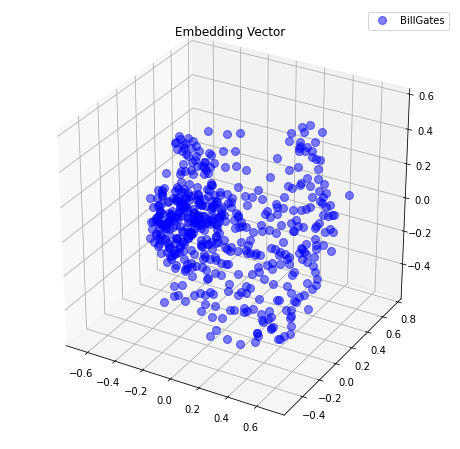

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(Xd[:,0], Xd[:,1], Xd[:,2],
        'o', markersize=8, color='blue', alpha=0.5)
plt.title('Embedding Vector')
ax.legend(loc='upper right')

plt.show()

In [54]:
def calc_dist(img_emb0, img_emb1):
    return distance.euclidean(img_emb0, img_emb1)

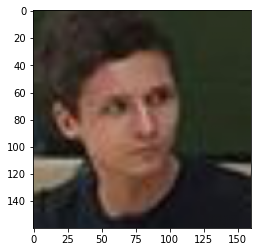

In [159]:
i1 = 8
embOrig = embedded[i1]
plt.imshow(faces[i1])

In [ ]:
distances = []
for emb_pos in embedded:
    distances.append(calc_dist(embOrig, emb_pos))

In [ ]:
faces_sorted = sorted(enumerate(faces), key = lambda i: distances[i[0]])

In [ ]:
index = 5
plt.imshow(faces_sorted[index][1])
print(sorted(distances)[index])

In [30]:
f = FaceLoader('https://sun3-12.userapi.com/c846021/v846021276/38d2d/ybgiwGxzjnQ.jpg')
l = f.load_and_align_image(margin=20)

In [32]:
l.shape

(29, 160, 160, 3)

In [40]:
faces = np.zeros((0, 160, 160, 3))
for url in tqdm.tqdm_notebook(['https://sun3-12.userapi.com/c846021/v846021276/38d2d/ybgiwGxzjnQ.jpg']):
    face_obj = FaceLoader(url, margin=20)
    faces_tmp = face_obj.load_and_align_image(margin=20)
    if len(faces_tmp) == 0:
        continue
    faces = np.vstack((faces, faces_tmp))
    del face_obj

In [41]:
faces.shape

(29, 160, 160, 3)